In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm 
from iminuit import Minuit, cost
from iminuit.cost import LeastSquares
import pandas as pd
import sympy as sp
from sympy import symbols, diff, lambdify, solve 
from numpy.linalg import inv
from scipy.integrate import quad
from scipy.stats import binom


r = np.random
plt.rcParams['figure.figsize'] = [10, 10]


# 1.1

In [2]:
mean = 50    # Mean (mu)
std_dev = 20 # Standard deviation (sigma)

# Define the bounds of the integral
lower_bound =   55
upper_bound = 65

# Calculate the integral using the CDF
area = norm.cdf(upper_bound, loc=mean, scale=std_dev) - norm.cdf(lower_bound, loc=mean, scale=std_dev)
print(f'The area under the curve is {area}')

The area under the curve is 0.17466632194020804


In [3]:
#Usikkerheden på gennemsnittet er sigma/sqrt(n), så den burde være
RMSEanalytical = std_dev/np.sqrt(120)
print(f'Analytical RMSE is {RMSEanalytical}')
# Vi kan udregne det ved at skrive
A = r.normal(mean, std_dev, 120)
print(f"The numerical RMSE is {np.std(A,ddof = 1)/np.sqrt(120)}")

Analytical RMSE is 1.8257418583505538
The numerical RMSE is 1.7745274951816783


Text(0.5, 1.0, 'The fraction is 0.178665')

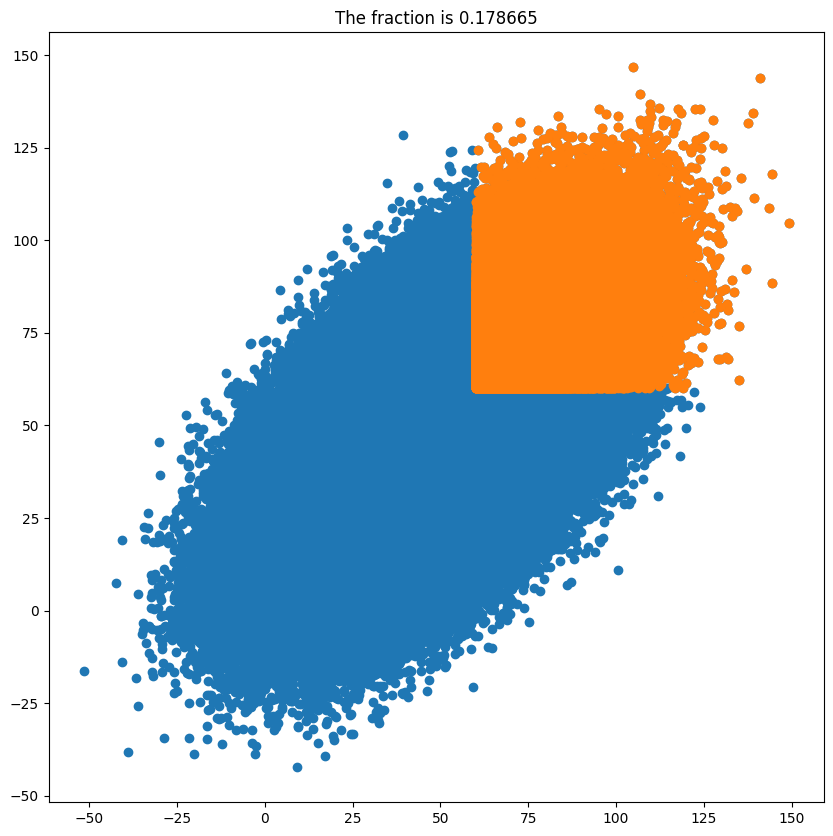

In [4]:
#Vi laver en covarians matrixe, som har standardafvigelserne^2 på diagonalen og korrelationen på tværs, som er rho*std1*std2
rho = 0.6
cov = [[std_dev**2, rho*std_dev**2], [rho*std_dev**2, std_dev**2]] 
vals = np.random.multivariate_normal([mean,mean],cov = cov, size = 1000000)
testa,testb = vals.T
maskover60 = (testa > 60) & (testb > 60)
plt.scatter(testa,testb)
plt.scatter(testa[maskover60],testb[maskover60])
plt.title(f"The fraction is {np.sum(maskover60)/len(testa)}")

# 1.2

In [5]:
#Binomial, med p = 40
n = 20  # number of trials
p = 0.4  # probability of success

# Calculate P(X >= 11)
prob_at_least_11 = 1 - binom.cdf(10, n, p)
prob_at_least_11

0.12752124614721683

# 2.1

In [6]:
#Ophob til 1'eren, og indsæt værdier.

In [7]:
#Brug den her og ophob som før, bare med det ekstra led.

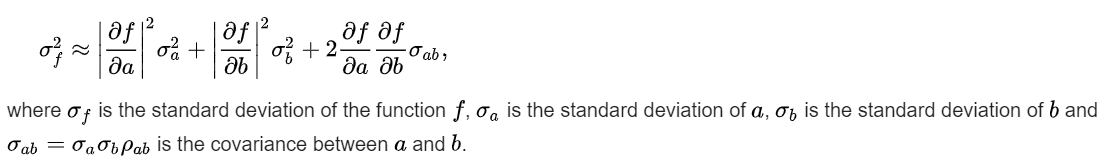

In [8]:
# Spørg rasmus, ellers find ud af det!

# 2.2

In [9]:
result = np.array([5.5,5.61,4.88,5.07,5.26])
err = np.array([0.1,0.21,0.15,0.14,0.13])


In [10]:
# Lav vægtet gennemsnit

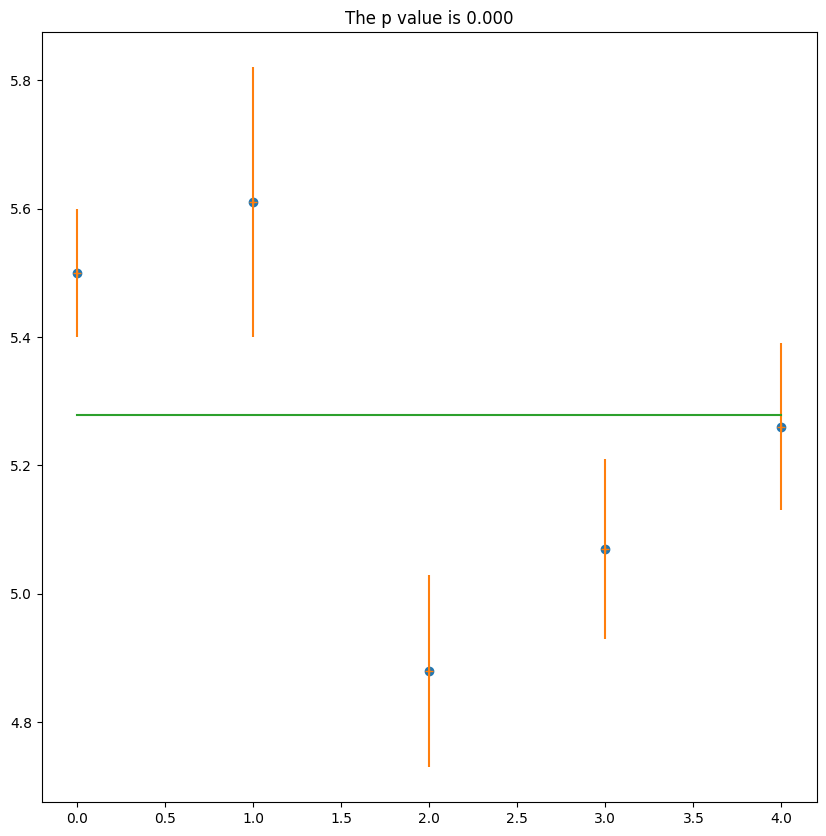

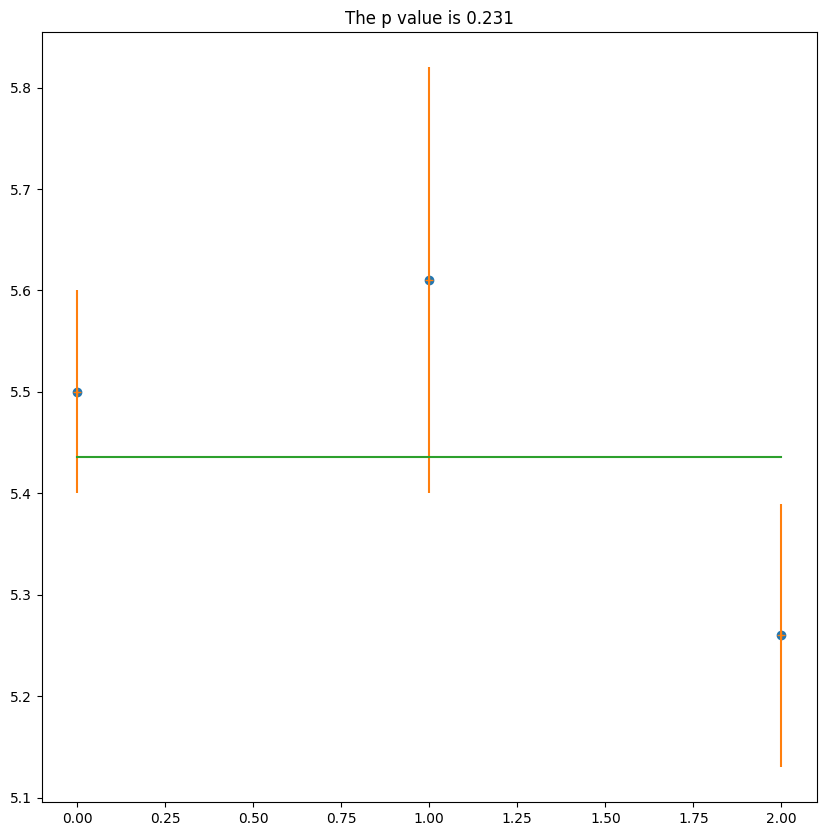

Which is significantly better, but they are still not consistent
My best estimate is to do the weighted average again with the resultnew and errnew


In [11]:
def straight_line(x,a):
    return x-x+a
plt.plot(result, 'o')
plt.errorbar(np.arange(5), result, yerr=err, fmt='+')
chistraight = LeastSquares(np.arange(0,len(result),1),result, err, straight_line)
mstraight = Minuit(chistraight, a=0)
mstraight.migrad()
plt.plot(np.arange(5),straight_line(np.arange(5),mstraight.values['a']))
plt.title(f"The p value is {1-stats.chi2.cdf(mstraight.fval,2):.3f}")
#so pretty bad and not consistent. Removing the datapoint at 4.88 and 5.07 yeilds
plt.show()
resultnew = np.array([5.5,5.61,5.26])
errnew = np.array([0.1,0.21,0.13])
plt.plot(resultnew, 'o')
plt.errorbar(np.arange(len(resultnew)), resultnew, yerr=errnew, fmt='+')
chistraight = LeastSquares(np.arange(0,len(resultnew),1),resultnew, errnew, straight_line)
mstraight = Minuit(chistraight, a=0)
mstraight.migrad()
plt.plot(np.arange(len(resultnew)),straight_line(np.arange(len(resultnew)),mstraight.values['a']))
plt.title(f"The p value is {1-stats.chi2.cdf(mstraight.fval,2):.3f}")
plt.show()
print("Which is significantly better, but they are still not consistent")
print("My best estimate is to do the weighted average again with the resultnew and errnew")

In [12]:
weightedaverage = np.average(resultnew,weights = 1/errnew**2)
uncertainty = 1/np.sqrt(np.sum(1/errnew**2))
#print(f"The weighted average is {np.average(resultnew,weights = 1/errnew**2)}")
#print(f"The uncertainty is {1/np.sqrt(np.sum(1/errnew**2))}")

In [13]:
# We check how many standard deviations away it is and we get
stdeviations = ((5.514-weightedaverage)/uncertainty)
#We check with a t test
ttest = stats.ttest_1samp(resultnew,weightedaverage)
print(f"The weighted average is {weightedaverage:.3f} with an uncertainty of {uncertainty:.3f}")
print(f"The weighted average is {stdeviations:.3f} standard deviations away")
print(f"The t test gives a p value of {ttest.pvalue:.3f}")
#So pretty well

The weighted average is 5.436 with an uncertainty of 0.074
The weighted average is 1.057 standard deviations away
The t test gives a p value of 0.857


# 2.3

In [14]:
#Ophob de to ligninger, og indsæt værdier

In [15]:
#C er lidt mere tricky.
eval = 0.71
evalerr = 0.12
aval = 1.04
avalerr = 0.27
def C(a,e):
    return 4*a*np.sqrt(2-e**2), np.pi*aval*np.sqrt(4-2*eval**2)
def Cerr(a,e,aerr,eerr):
    err1 = (4*np.sqrt(2-e**2)*aerr)**2+(4*a*e*eerr/(np.sqrt(2-e**2)))**2
    err2 = (np.pi*np.sqrt(4-2*e**2)*aerr)**2+(np.sqrt(2)*np.pi*a*eerr/(np.sqrt(4-2*e**2)))**2
    return np.sqrt(err1),np.sqrt(err2)
a1 =C(aval,eval)
a2 = Cerr(aval,eval,avalerr,evalerr)
print(f"The first value is {a1[0]:.3f} with an uncertainty of {a2[0]:.3f}")
print(f"The second value is {a1[1]:.3f} with an uncertainty of {a2[1]:.3f}")

The first value is 5.088 with an uncertainty of 1.352
The second value is 5.651 with an uncertainty of 1.502


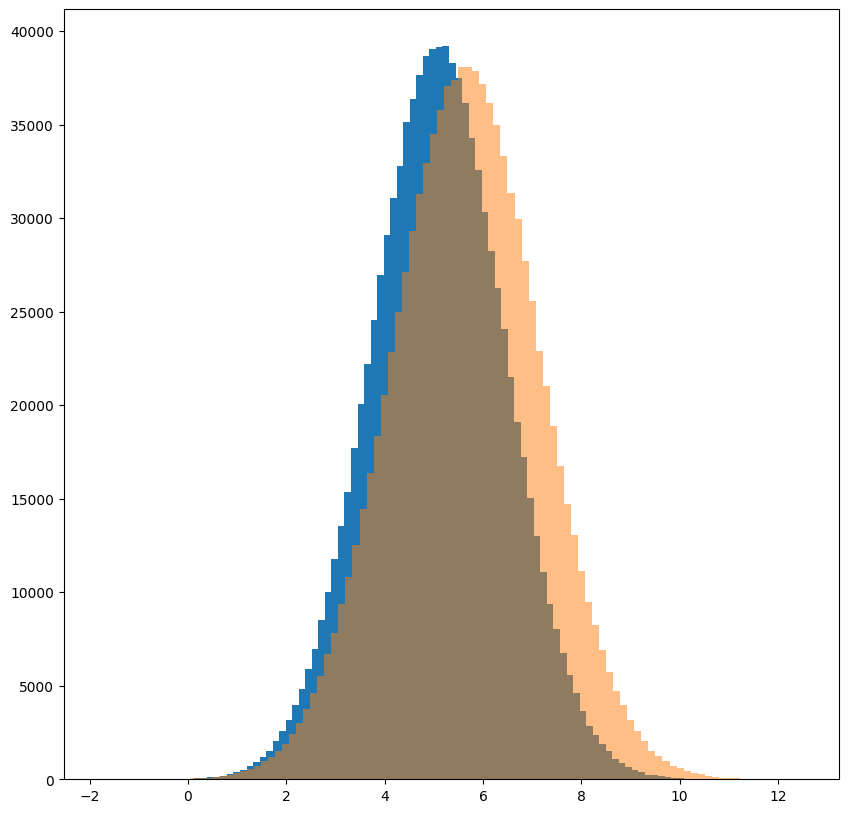

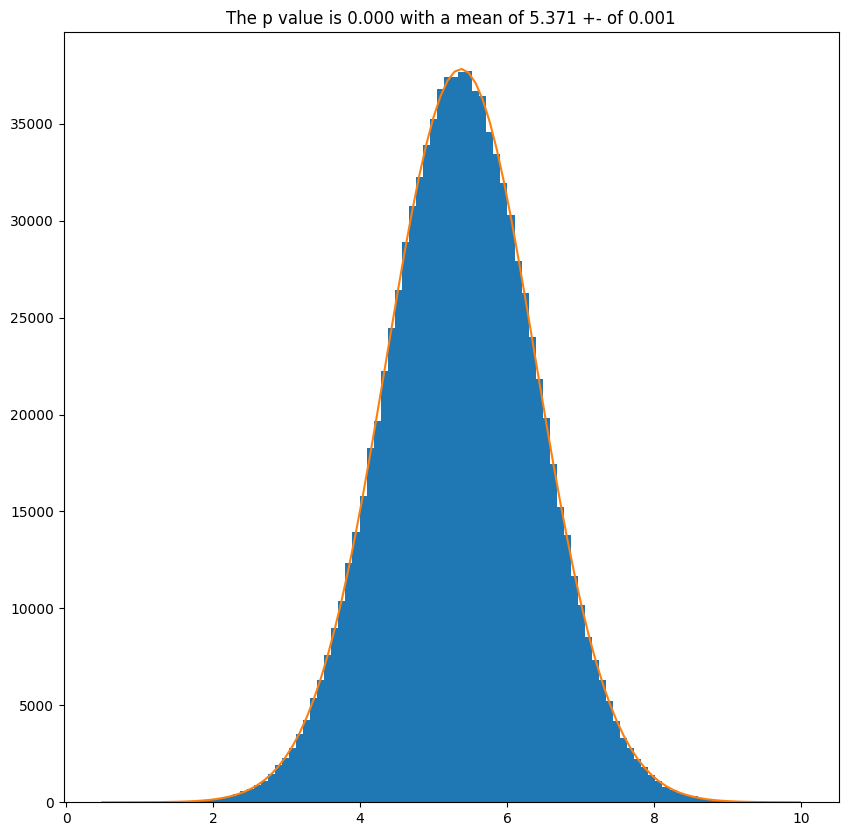

In [16]:
def gauss(x,mu,sigma,N):
    return N/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)
histvals1 = np.random.normal(a1[0],a2[0],1000000)
histvals2 = np.random.normal(a1[1],a2[1],1000000)
mu1 = a1[1]
sigma1 = a2[1]
mu2 = a1[0]
sigma2 = a2[0]
counts,bins = np.histogram((histvals1+histvals2)/2,bins = 100)
bincenters = 0.5*(bins[1:]+bins[:-1])
zeromask = counts >0
counts = counts[zeromask]
bincenters = bincenters[zeromask]

plt.hist(histvals1,bins = 100)
plt.hist(histvals2,bins = 100, alpha = 0.5)
plt.show()
plt.hist((histvals1+histvals2)/2,bins = 100)
chi2gaus = LeastSquares(bincenters,counts,np.sqrt(counts),gauss)
mgaus = Minuit(chi2gaus,mu = 0,sigma = 1,N = 1)
mgaus.migrad()
plt.plot(bincenters,gauss(bincenters,mgaus.values['mu'],mgaus.values['sigma'],mgaus.values['N']))
plt.title(f"The p value is {1-stats.chi2.cdf(mgaus.fval,len(counts)-3):.3f} with a mean of {mgaus.values['mu']:.3f} +- of {mgaus.errors['mu']:.3f}")
plt.show()

# 3.1

In [17]:
Ttruckerr = 120
Tshiperr = 50
dt = 130
amountlist = []
for i in range(10000):
    timevalstruck = r.normal(-dt,Ttruckerr,1)
    timevalsship = r.normal(0,Tshiperr,1)
    mask = timevalstruck < timevalsship
    amountlist.append(1-np.sum(mask)/len(mask))
amountlist = np.array(amountlist)
print(np.mean(amountlist),  '+-', np.std(amountlist,ddof = 1)/np.sqrt(len(amountlist)),'% ')


0.1634 +- 0.0036974871387354556 % 


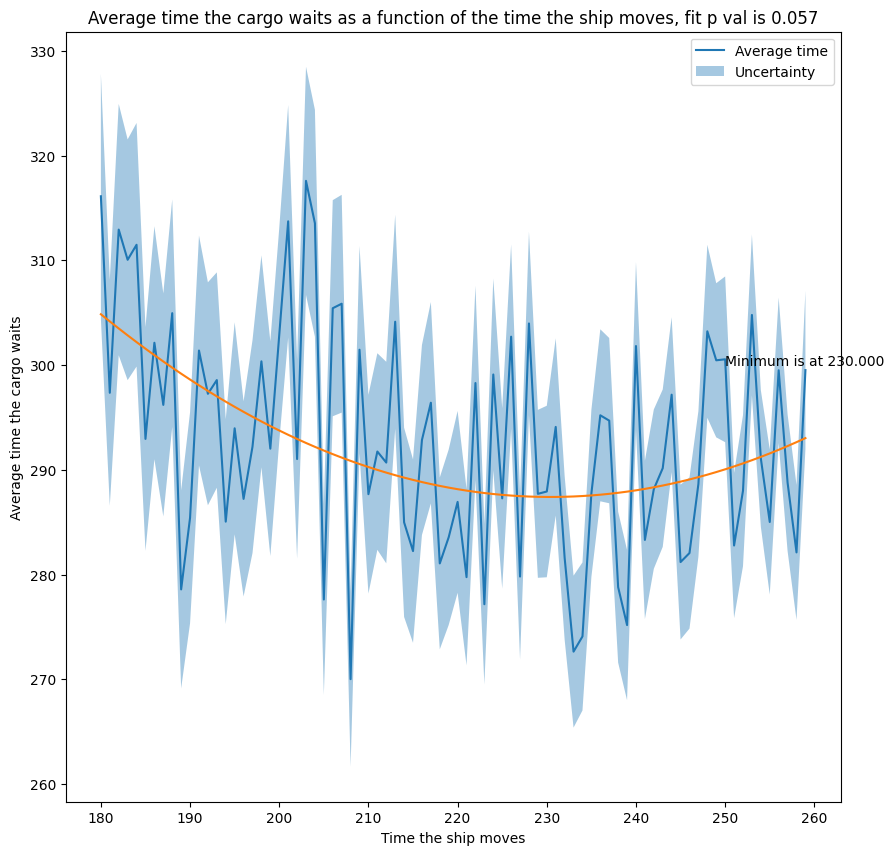

In [18]:
Ttruckerr = 120
Tshiperr = 50
dt = np.arange(180,260,1)
average = []
uncertainty = []
for d in dt:
    timelist = []
    for i in range(1000):
        timevalstruck = r.normal(0,Ttruckerr,1)
        timevalsship = r.normal(d,Tshiperr,1)
        if timevalstruck < timevalsship:
           timelist.append((timevalsship-timevalstruck)[0])
        elif timevalstruck == timevalsship:
           timelist.append(0)
        elif timevalstruck > timevalsship:
           timelist.append(24*60)
    average.append(np.mean(timelist))
    uncertainty.append(np.std(timelist,ddof = 1)/np.sqrt(len(timelist)))

def quadfit(x,a,b,c):
    return a*x**2+b*x+c
chi2quad = LeastSquares(dt,average,uncertainty,quadfit)
mquad = Minuit(chi2quad,a = 0,b = 0,c = 0)
mquad.migrad()
plt.plot(dt,average, label = 'Average time')
plt.fill_between(dt, np.array(average) - np.array(uncertainty), 
                 np.array(average) + np.array(uncertainty), alpha=0.4, label='Uncertainty')
plt.xlabel('Time the ship moves')
plt.ylabel('Average time the cargo waits')
plt.legend()
plt.plot(dt,quadfit(dt,mquad.values['a'],mquad.values['b'],mquad.values['c']))
plt.title(f"Average time the cargo waits as a function of the time the ship moves, fit p val is {1-stats.chi2.cdf(mquad.fval,len(average)-3):.3f}")
plt.text(250, 300, f"Minimum is at {dt[np.argmin(quadfit(dt,mquad.values['a'],mquad.values['b'],mquad.values['c']))]:.3f}")
plt.show()
#Find usikkerhed på det ved at lave bootstrapping i guess

# 3.2

In [19]:
# Vi laver den invers, der kna ikke bruges hit and miss siden den ikke er begrænset på x-aksen

$$\int^{x}_0 f(x)dx = -e^{-0.5*\dfrac{x^2}{\sigma^2}}+1$$
$$F^{-1}(r)=\sqrt{-2*ln(1-r)*\sigma^2}$$

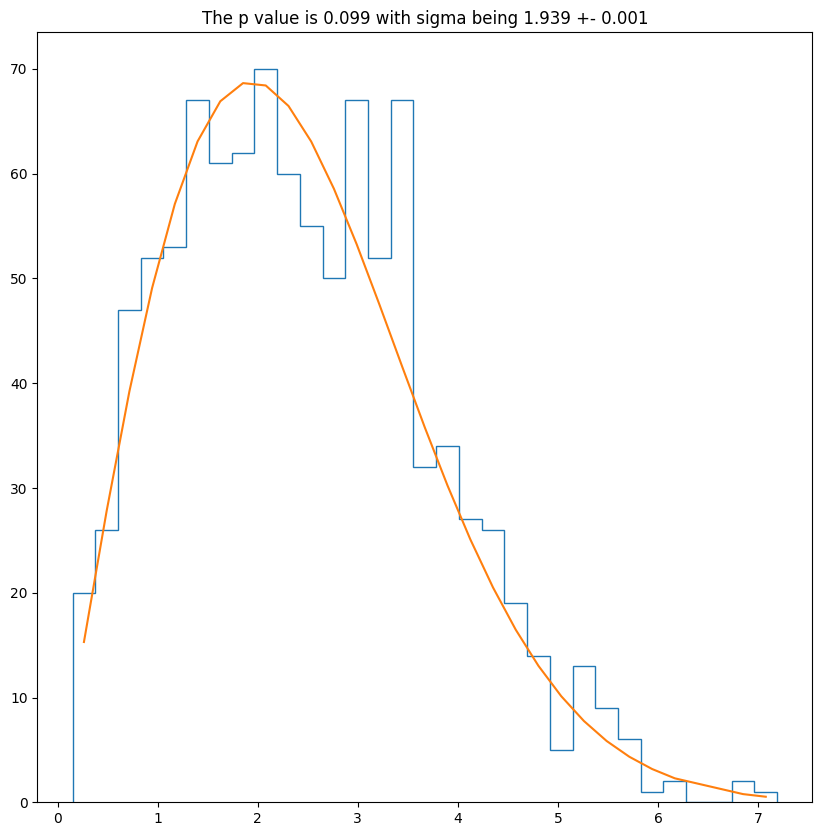

In [20]:
N = 1000
ranuni = r.uniform(0,1,N)
def inverse(x,sigma = 2):
    return np.sqrt(-np.log(1-x)*2*sigma**2)
    #return np.sqrt(-2*np.log(1-x)*sigma**2)
def rayleigh(x,N,sigma = 2):
    return N*x/sigma**2*np.exp(-0.5*(x/sigma)**2)
newxvals = inverse(ranuni)
#Vi fitter en rayleigh til det
counts,bins = np.histogram(newxvals,bins = int(np.sqrt(N)))
bincenters = 0.5*(bins[1:]+bins[:-1])
countsmask = counts > 0
counts = counts[countsmask]
bincenters = bincenters[countsmask]
chi2ray = LeastSquares(bincenters,counts,np.sqrt(counts),rayleigh)
mray = Minuit(chi2ray,N = 70,sigma = 1)
mray.migrad()
plt.hist(newxvals,bins = int(np.sqrt(N)),histtype='step')
plt.plot(bincenters,rayleigh(bincenters,mray.values['N'],mray.values['sigma']))
plt.title(f"The p value is {1-stats.chi2.cdf(mray.fval,len(counts)-1):.3f} with sigma being {mray.values['sigma']:.3f} +- {mray.errors['sigma']/np.sqrt(N):.3f}")
plt.show()


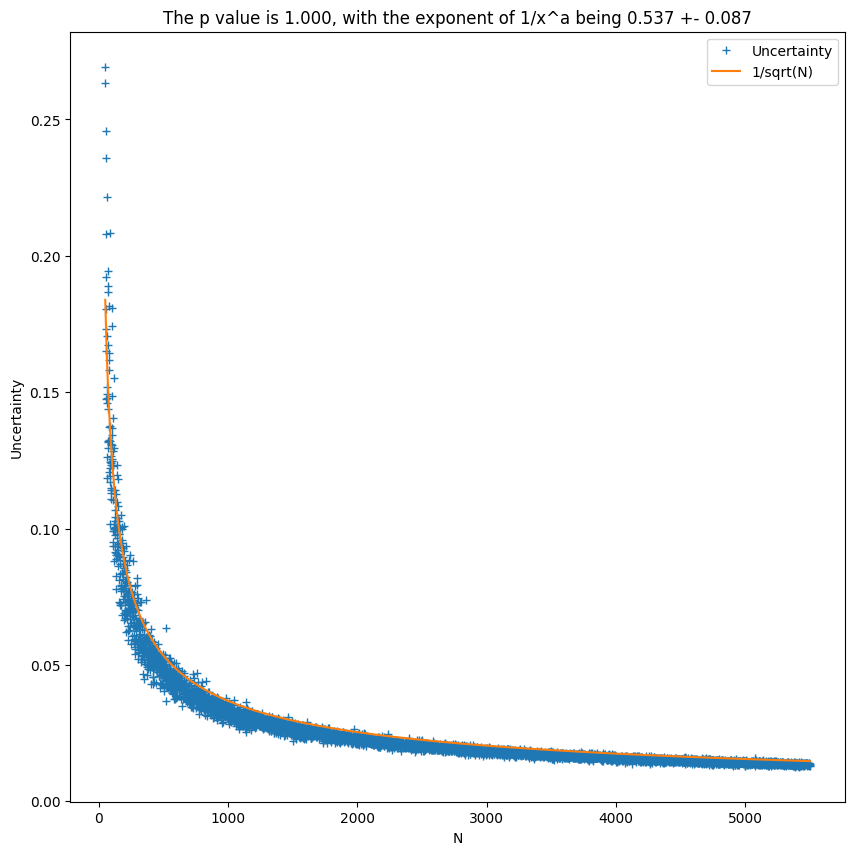

In [21]:
def quadratic(x,sigma,a):
    return sigma/x**a
sigmaunc = []
NSS = np.arange(50,5500,1)

for j,N in enumerate(NSS):
    #ranuni = r.uniform(0,1,int(N))
    #newxvals = inverse(ranuni)
    newxvals = stats.rayleigh.rvs(loc = 0, scale = 2, size = N)
    #Vi fitter en rayleigh til det

    counts,bins = np.histogram(newxvals,bins = int(np.sqrt(N)))
    bincenters = 0.5*(bins[1:]+bins[:-1])
    countsmask = counts > 0
    counts = counts[countsmask]
    bincenters = bincenters[countsmask]
    chi2ray = LeastSquares(bincenters,counts,np.sqrt(counts),rayleigh)
    mray = Minuit(chi2ray,N = 100,sigma = 2)
    mray.migrad()
    sigmaunc.append(mray.errors['sigma'])

chi2quad = LeastSquares(NSS,sigmaunc,np.sqrt(NSS),quadratic)
mquad = Minuit(chi2quad,sigma = 2,a = 0.5)
mquad.migrad()
plt.plot(NSS,sigmaunc,'+',label = 'Uncertainty')
plt.plot(NSS,quadratic(NSS,mquad.values['sigma'],mquad.values['a']),label = '1/sqrt(N)')
plt.title(f"The p value is {1-stats.chi2.cdf(mquad.fval,len(sigmaunc)-1):.3f}, with the exponent of 1/x^a being {mquad.values['a']:.3f} +- {mquad.errors['a']/np.sqrt(len(sigmaunc)):.3f}")
plt.legend()
plt.xlabel('N')
plt.ylabel('Uncertainty')
plt.show()


# 4.1

# 4.2

In [79]:
data = np.genfromtxt('data_CountryScores.txt', delimiter = ',', skip_header = 1)
Country = data[:,0]
GDP = data[:,1]
PopSize = data[:,2]
Happines = data[:,3]
EconFreedom = data[:,4]
PressFreedom = data[:,5]
Education = data[:,6]


The mean of gdp is 17362.045112781954 +-  2067.2120273317246 $
The median of gdp is 6677.0 $
The 25% and 75% quantile of gdp is 2047.0 and 23762.0 respectively


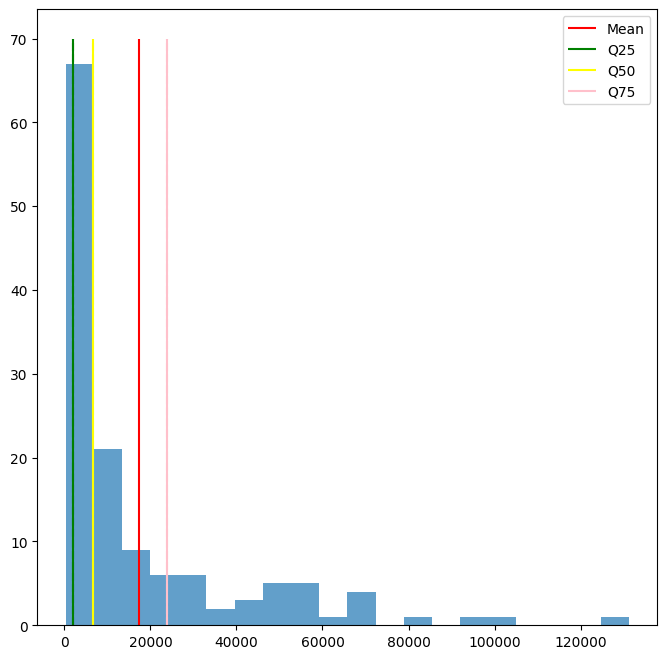

In [106]:
print("The mean of gdp is",np.mean(GDP),"+- ",np.std(GDP,ddof = 1)/np.sqrt(len(GDP)),"$")
print("The median of gdp is",np.median(GDP),"$")
print("The 25% and 75% quantile of gdp is",np.quantile(GDP,0.25),"and",np.quantile(GDP,0.75),"respectively")
Mean_gdp = np.mean(GDP)

#Quantiles using numpy
q25 = np.quantile(GDP, .25)
q50 = np.quantile(GDP, .50)
q75 = np.quantile(GDP, .75)


fig, ax = plt.subplots(1,1,figsize = (8,8))

ax.hist(GDP, bins = 20, alpha = .7);
ax.vlines(Mean_gdp, 0, 70, color = 'red')
ax.vlines(q25, 0, 70, color = 'green')
ax.vlines(q50, 0, 70, color = 'yellow')
ax.vlines(q75, 0, 70, color = 'pink')
ax.legend(['Mean', 'Q25', 'Q50', 'Q75'])

# Quantiles using a custom method
GDP_sorted = np.sort(GDP)
Q25 = GDP_sorted[int(25*len(GDP)/100)]
Q50 = GDP_sorted[int(50*len(GDP)/100)]
Q75 = GDP_sorted[int(75*len(GDP)/100)]
ax.vlines(Q25, 0, 70, ls = '--', color = 'green')
ax.vlines(Q50, 0, 70, ls = '--', color = 'yellow')
ax.vlines(Q75, 0, 70, ls = '--', color = 'pink')
plt.show()


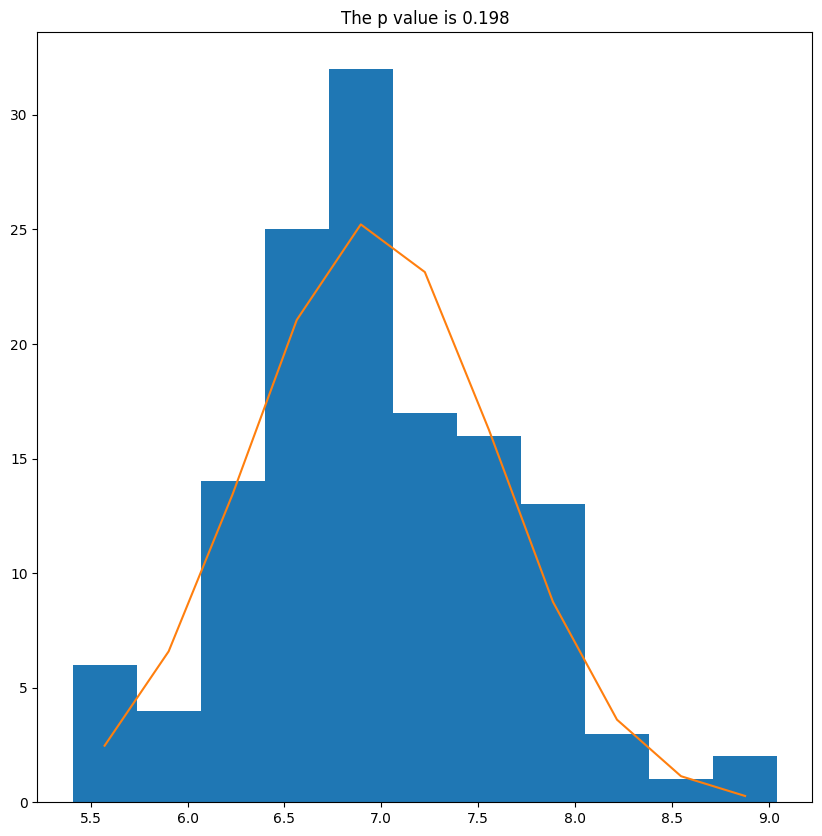

In [114]:
def gauss(x,mu,sigma,N):
    return N/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)
log_pop = np.log10(PopSize)
plt.hist(log_pop,bins =int(np.sqrt(len(log_pop))))
counts,bins = np.histogram(log_pop,bins = int(np.sqrt(len(log_pop))))
bincenters = 0.5*(bins[1:]+bins[:-1])
zeromask = counts >0
counts = counts[zeromask]
bincenters = bincenters[zeromask]
chi2gaus = LeastSquares(bincenters,counts,np.sqrt(counts),gauss)
mgaus = Minuit(chi2gaus,mu = 0,sigma = 1,N = 1)
mgaus.migrad()
plt.plot(bincenters,gauss(bincenters,mgaus.values['mu'],mgaus.values['sigma'],mgaus.values['N']))
plt.title(f"The p value is {1-stats.chi2.cdf(mgaus.fval,len(counts)-3):.3f}") # Use a BLLH though
plt.show()


0.8043593869327468 0.7647440306793953


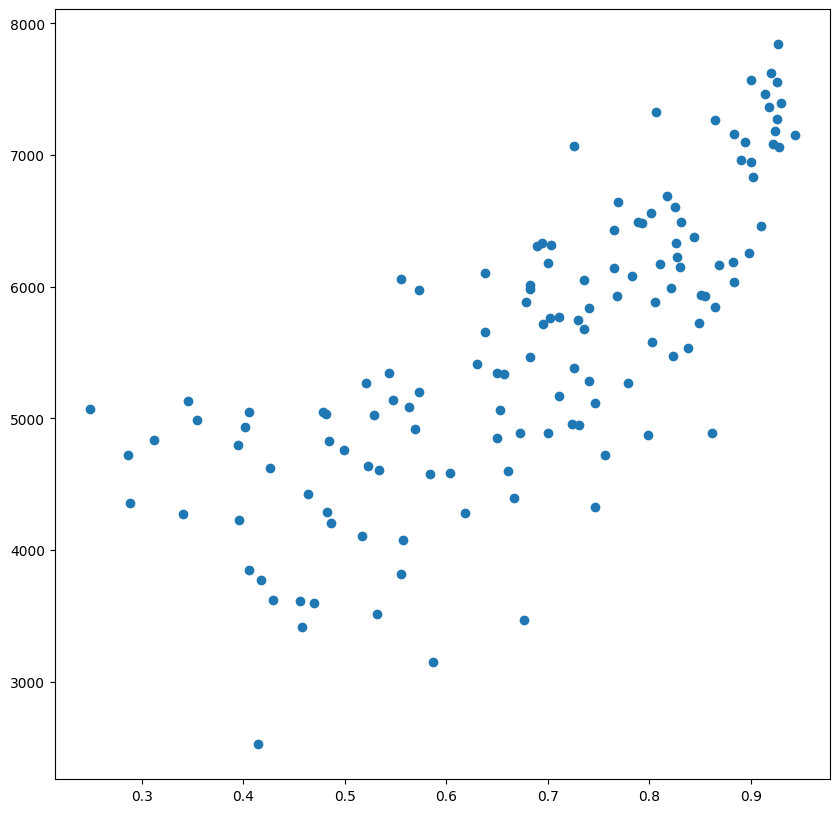

In [120]:
def spearmancorr(x,y):
    return stats.spearmanr(x,y)[0]
def pearsoncorr(x,y):
    return stats.pearsonr(x,y)[0]
print(spearmancorr(Education,Happines),pearsoncorr(Education,Happines))
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(Education, Happines)

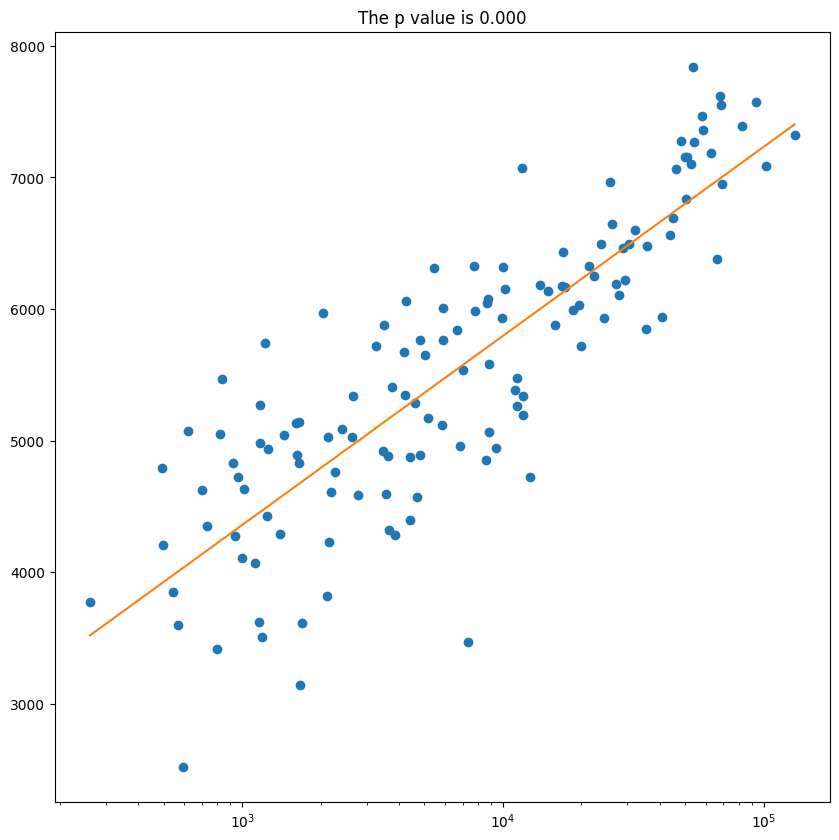

In [144]:
plt.plot(GDP,Happines,'o')
def logfunc(x,a,b):
    return a*np.log(x)+b
chi2log = LeastSquares(np.sort(GDP),Happines[np.argsort(GDP)],np.ones(len(Happines)),logfunc)
mlog = Minuit(chi2log,a = 1,b = 1)
mlog.migrad()
plt.plot(np.sort(GDP),logfunc(np.sort(GDP),mlog.values['a'],mlog.values['b']))
plt.title(f"The p value is {1-stats.chi2.cdf(mlog.fval,len(Happines)-2):.3f}")
plt.xscale('log')
plt.show()


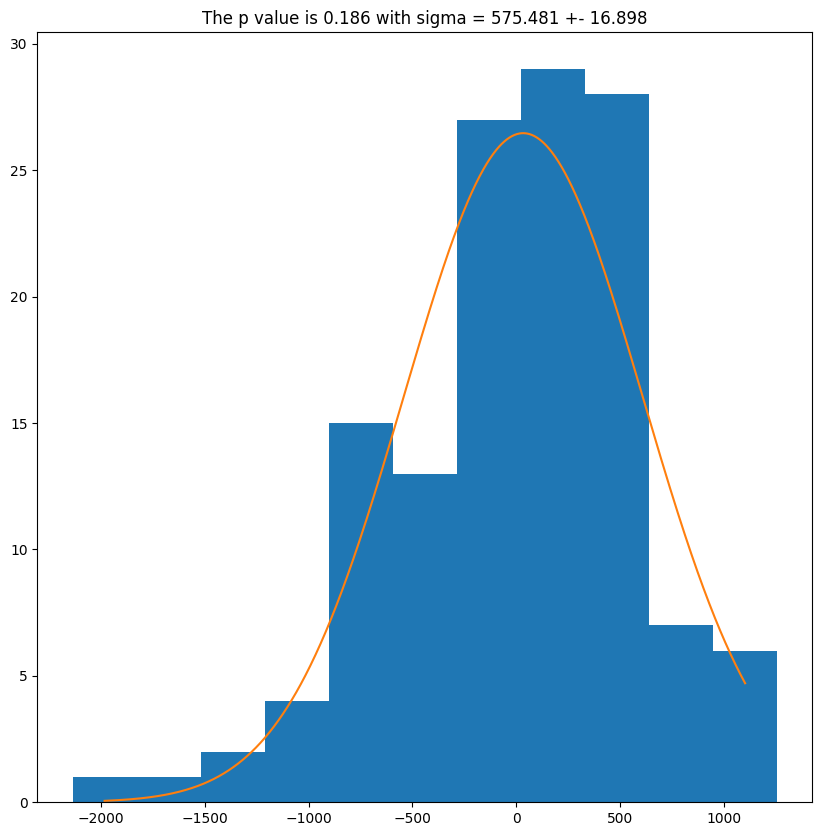

In [160]:
residuals = Happines[np.argsort(GDP)]-logfunc(np.sort(GDP),mlog.values['a'],mlog.values['b'])
plt.hist(residuals,bins = int(np.sqrt(len(residuals))))
counts,bins = np.histogram(residuals,bins = int(np.sqrt(len(residuals))))
bincenters = 0.5*(bins[1:]+bins[:-1])
zeromask = counts >0
counts = counts[zeromask]
bincenters = bincenters[zeromask]
binwidth = bins[1]-bins[0]
chi2gaus = LeastSquares(bincenters,counts,np.sqrt(counts),gauss)
binspace = np.linspace(np.min(bincenters),np.max(bincenters),1000)
mgaus = Minuit(chi2gaus,mu = 0,sigma = 250,N = binwidth*np.sum(counts))
mgaus.migrad()
plt.plot(binspace,gauss(binspace,mgaus.values['mu'],mgaus.values['sigma'],mgaus.values['N']))
plt.title(f"The p value is {1-stats.chi2.cdf(mgaus.fval,len(counts)-3):.3f} with sigma = {mgaus.values['sigma']:.3f} +- {mgaus.errors['sigma']/np.sqrt(len(bincenters)):.3f}") # Use a BLLH though

plt.show()


# 5.1

The relative uncertainty of a measurement is given by the magnitude of the uncertainty divided by the magnitude of the measurement

$$\frac{\sigma_{x}}{x}$$

This was calculated for all measurements of area and volume. The arithmetic means was used to estimate the average relative uncertainty for both variables.
This gives an average relative uncertainty of Area, $\mu_A$ = 0.013, and an average relative uncertainty of Volume, $\mu_V$ = 0.10.
It is thus volume which has the largest relative uncertainty.


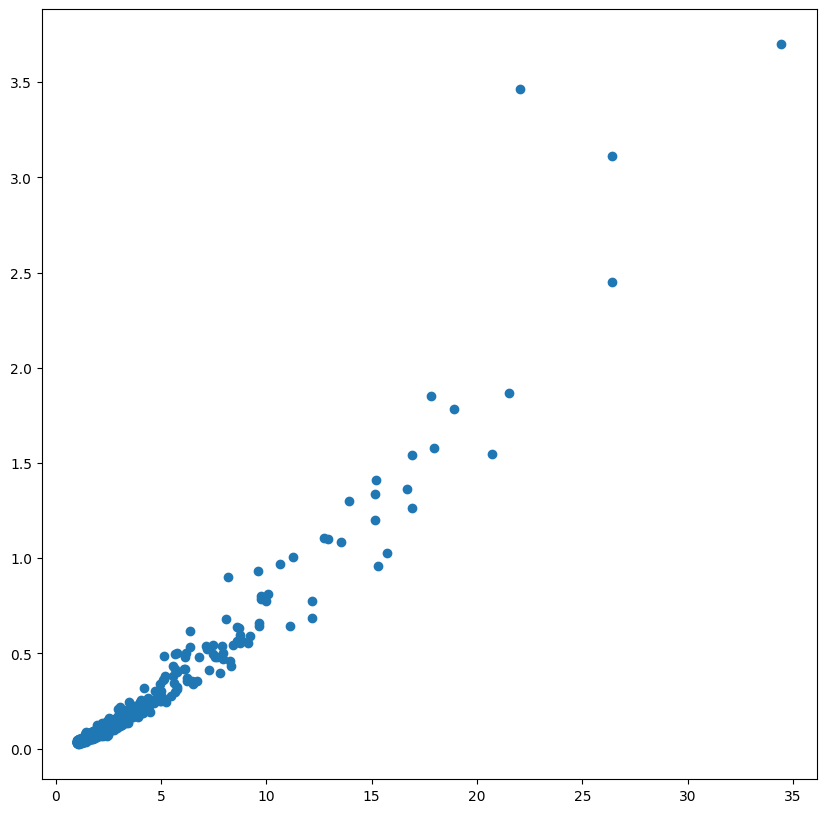

In [126]:
data = np.genfromtxt('data_GlacierSizes.csv', delimiter = ',', skip_header = 1)

Area_uncertain = data[:,0] / data[:,1]
Volume_uncertain = data[:,2] / data[:,3]

area = data[:,0]
area_err = data[:,1]
volume = data[:,2]
volume_err = data[:,3]
plt.plot(area,volume,'o')

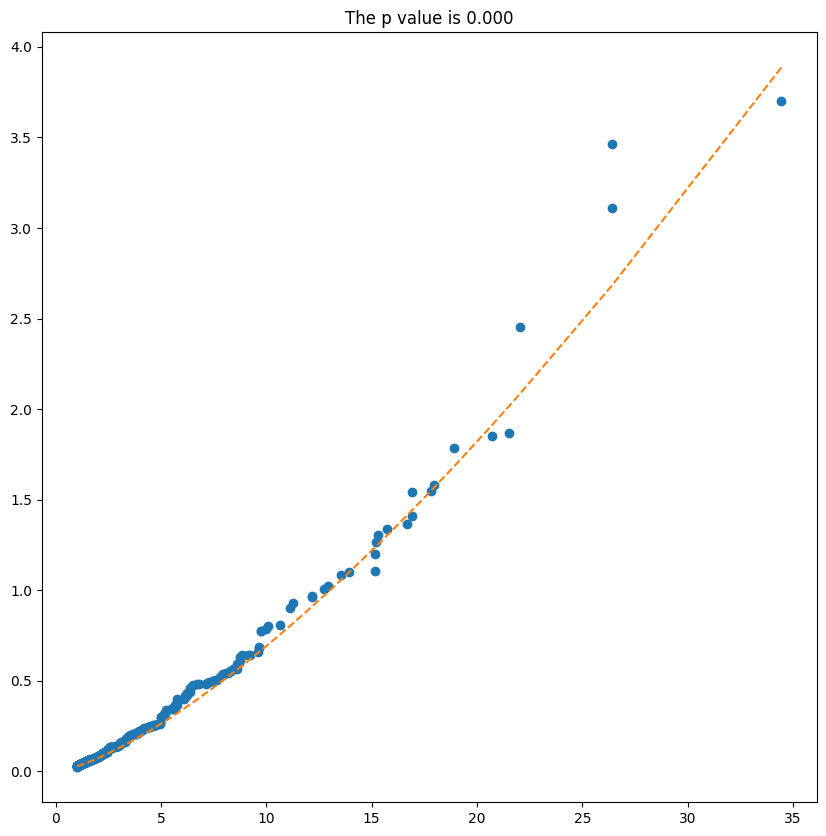

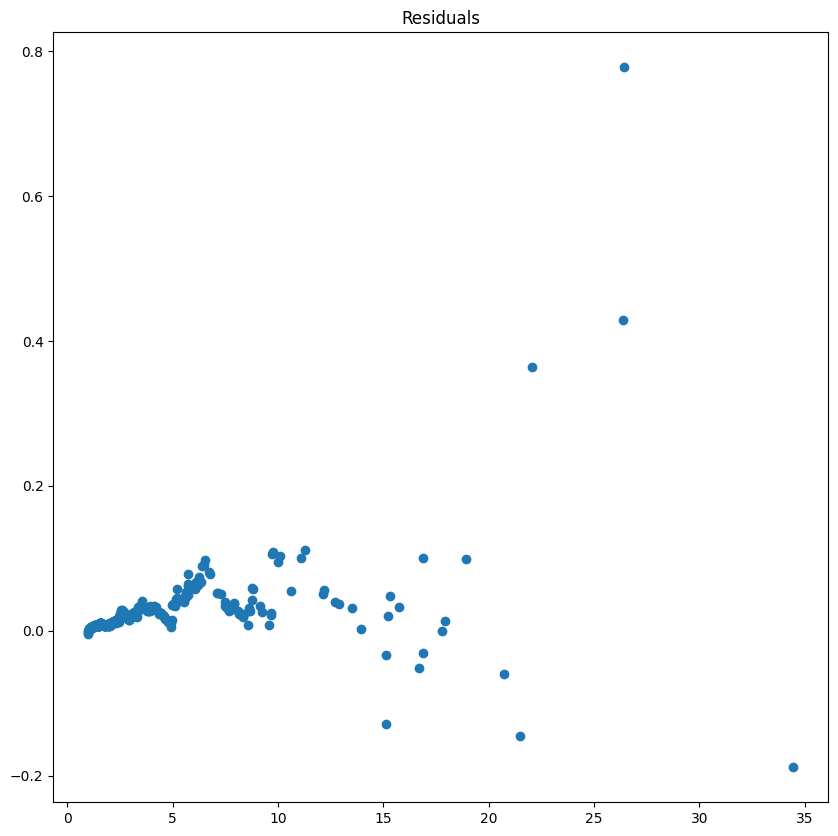

In [131]:
def areafunc(area,c,expo):
    return c*area**(expo)
chi2volarea = LeastSquares(area,volume,volume_err,areafunc)
mvolarea = Minuit(chi2volarea,c = 1,expo = 3/2)
mvolarea.migrad()
plt.plot(np.sort(area),np.sort(volume),'o')
plt.plot(np.sort(area),areafunc(np.sort(area),mvolarea.values['c'],mvolarea.values['expo']),'--')
plt.title(f"The p value is {1-stats.chi2.cdf(mvolarea.fval,len(area)-2):.3f}")
plt.show()
plt.plot(np.sort(area),np.sort(volume)-areafunc(np.sort(area),mvolarea.values['c'],mvolarea.values['expo']),'o')
plt.title(f"Residuals")
plt.show()

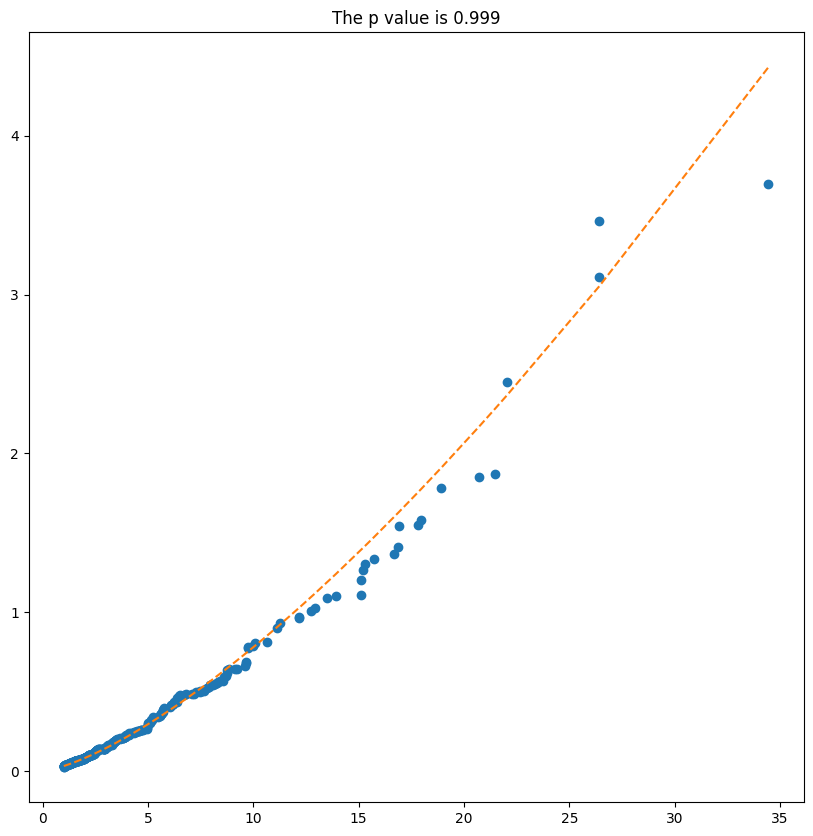

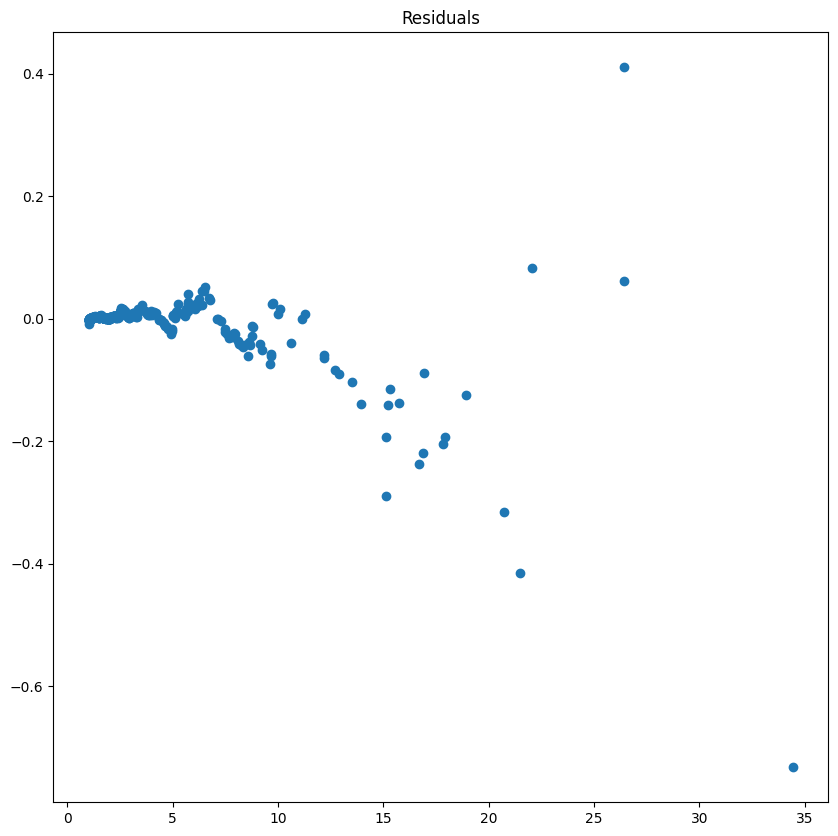

In [69]:
#Den totale usikkerhed er givet ved ophobning
def totalerrfunc(area,volerr = volume_err,area_err = area_err): 
    return np.sqrt(volerr**2+(mvolarea.values['expo']*area_err*areafunc(area,mvolarea.values['c'],mvolarea.values['expo'])/area)**2)
totalerr = totalerrfunc(area)
chi2volarea2 = LeastSquares(area,volume,totalerr,areafunc)
mvolarea2 = Minuit(chi2volarea2,c = 1,expo = 3/2)
mvolarea2.migrad()
plt.plot(area,volume,'o')
plt.plot(area,areafunc(area,mvolarea2.values['c'],mvolarea2.values['expo']),'--')
plt.title(f"The p value is {1-stats.chi2.cdf(mvolarea2.fval,len(area)-2):.3f}")
plt.show()
plt.plot(area,volume-areafunc(area,mvolarea2.values['c'],mvolarea2.values['expo']),'o')
plt.title(f"Residuals")
plt.show()

In [76]:
expoerr = mvolarea2.errors['expo']
expo = mvolarea2.values['expo']
c = mvolarea2.values['c']
cerr = mvolarea2.errors['c']
expected_vol = areafunc(0.5,c,expo)
#expected_vol = areafunc(0.5,mvolarea2.values['c'],mvolarea2.values['expo'])
newerr = np.sqrt((expoerr*expected_vol/0.5)**2+(cerr*expected_vol/c)**2)
print(f"The expected volume is {expected_vol:.4f} +- {newerr:.4f}")

The expected volume is 0.0116 +- 0.0001
